# Implementing LSTM for Spam SMS Classification in NLP

LSTM networks are particularly effective in capturing long-term dependencies in sequences, such as words in a sentence

In [214]:
import nltk
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import sklearn.metrics as m
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [215]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [216]:
df=pd.read_csv('/content/drive/MyDrive/DataSets/spam.csv',encoding='latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [217]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [218]:
df['v2'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5572 entries, 0 to 5571
Series name: v2
Non-Null Count  Dtype 
--------------  ----- 
5572 non-null   object
dtypes: object(1)
memory usage: 43.7+ KB


In [219]:
df['v1'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5572 entries, 0 to 5571
Series name: v1
Non-Null Count  Dtype 
--------------  ----- 
5572 non-null   object
dtypes: object(1)
memory usage: 43.7+ KB


In [220]:
df.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [221]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

# Label Encoding

This is giving the labels spam and ham a categorical label of either 0 or 1

In [222]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label_test=le.fit_transform(df['label'])

# Implementation Of ClassWeights For Imbalanced Data

**Why is SMOTE not implement in LSTM**

SMOTE can corrupt sequences (since it generates fake sequences from numbers that represent word positions).

 it just generates interpolated numbers that don't represent real word patterns and end up learning from noise amd not real world patterns

**What Class Weights Do**

During training, if the model:

Misclassifies a ham message, it counts as 0.6 loss whish is a normal loss

Misclassifies a spam message, it counts as 2.4 loss which is penalized hence learn harder from it during backpropagation

This pushes the model to focus more on learning to detect spam — the minority class.




In [223]:
# Temporary computation of class weights
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df['label']),
    y=df['label']
)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [224]:
!pip install tensorflow
!pip install keras

# Implementation Of Label Encoding To Vector Format For The Neural Network

In [225]:
import keras
import tensorflow as tf

In [226]:
#Label Encoding in Keras into vector format using one hot encoding
from tensorflow.keras.utils import to_categorical
df['label']=to_categorical(label_test)
label_train = to_categorical(label_train, num_classes=2)

In [227]:
df['label']

,label
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
5567,0.0
5568,1.0
5569,1.0
5570,1.0


In [228]:
import re

In [229]:
len(set(stopwords.words('english')))

198

In [230]:
df['text']

,text
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [231]:
lemma=WordNetLemmatizer()


In [232]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [233]:
cleaned_text=[]
for text in df['text']:
  senti=re.sub('[^A-Za-z]',' ',text)
  senti=senti.lower()
  words=word_tokenize(senti)
  word=[lemma.lemmatize(i) for i in words if i not in stopwords.words('english')]
  senti=' '.join(word)
  cleaned_text.append(senti)


In [234]:
cleaned_text

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gon na home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw

# Text Encoding To Vector Format For Neural Network

In [235]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


In [236]:
one_hot_encoding_for_cleaned_text=[one_hot(i,10000) for i in cleaned_text]

In [237]:
maxi=[len(i) for i in one_hot_encoding_for_cleaned_text]

In [238]:
max(maxi)

77

# Padding
This is used to ensure same length of text is fed into yhe neural network

if a sentence is longer than the padding prameter it is truncated and if shorter it is padded with 0s

In [239]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [240]:
padsequences=pad_sequences(one_hot_encoding_for_cleaned_text,maxlen=80)

In [241]:
feature_train,feature_test,label_train,label_test=train_test_split(padsequences,df['label'],test_size=0.2,random_state=7)

# Building Of The Neural Network

In [242]:
model=Sequential()
model.add(Embedding(10000,64,input_length=80))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [243]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [244]:
model.fit(feature_train, label_train,
          validation_data=(feature_test, label_test),
          epochs=5,
          class_weight=class_weights_dict)

Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 24s 143ms/step - accuracy: 0.8380 - loss: 0.6587 - val_accuracy: 0.9570 - val_loss: 0.1401
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 15s 104ms/step - accuracy: 0.9780 - loss: 0.0554 - val_accuracy: 0.9830 - val_loss: 0.0546
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.9919 - loss: 0.0291 - val_accuracy: 0.9839 - val_loss: 0.0679
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - accuracy: 0.9956 - loss: 0.0127 - val_accuracy: 0.9830 - val_loss: 0.0766
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.9975 - loss: 0.0079 - val_accuracy: 0.9812 - val_loss: 0.0871


In [245]:
#This produces the probability distribution for the labels and classifies it to either spam or non spam
#The closer it is to 1 the more spam it is
label_prediction=model.predict(feature_test)

label_prediction_class = (label_prediction > 0.5).astype(int)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [246]:
label_prediction_class

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

# Evaluation

In [247]:
m.accuracy_score(label_test,label_prediction_class)

0.9811659192825112

In [248]:
print(m.confusion_matrix(label_test,label_prediction_class))

[[124  21]
 [  0 970]]


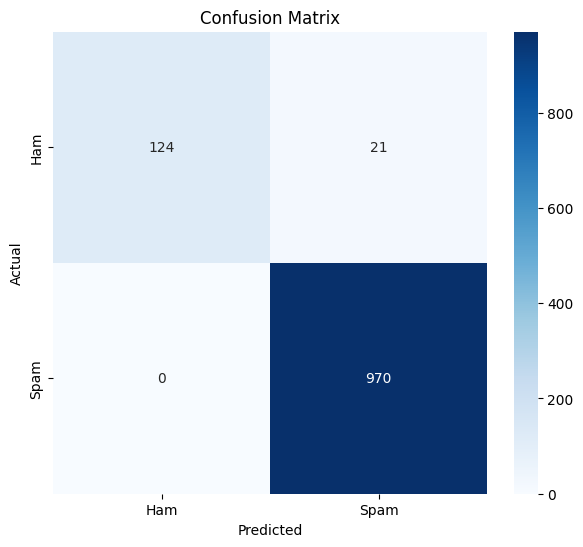

In [256]:
#Confusion Matrix
import seaborn as sns
plt.figure(figsize=(7, 6))
sns.heatmap(m.confusion_matrix(label_test,label_prediction_class),fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'],annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# How This Has Been Implemented

1.**label_test**: This is the true label from your dataset (whether an SMS is
  actually spam or not), which has been encoded into 0 (non-spam) and 1 (spam).

2.**label_prediction_class**: This is the model’s prediction for each sample, which has been passed through the neural network. The model outputs probabilities (values between 0 and 1), and you apply a threshold of 0.5 to convert these probabilities into 0 or 1. For example:



> **How Accuracy_Score has been determined**



If the model predicts a probability greater than 0.5, the predicted class is 1 (spam).

If the model predicts a probability less than or equal to 0.5, the predicted class is 0 (non-spam).

These two—label_test (true labels) and label_prediction_class (predicted labels)—are compared to evaluate the model's performance using metrics like accuracy_score